


1.For the MNIST dataset, apply the feature reduction using singular value decomposition

In [10]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd 

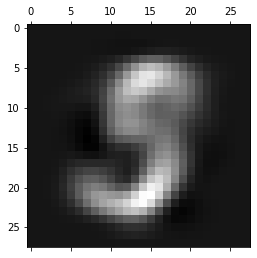

In [14]:
mnist = fetch_openml('mnist_784')
digits_df = mnist
X = digits_df.data
y = digits_df.target
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X)

image = svd.inverse_transform(X_svd[0].reshape(1, -1))
plt.matshow(image.reshape((28, 28)), cmap = "gray")
plt.show()

2.Classify the dataset using logistic regression before applying the feature reduction

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
from sklearn import linear_model

In [ ]:
digits_df = mnist
print('Digits dataset structure= ', dir(digits_df))
print('Data shape= ', digits_df.data.shape)
print('Data conatins pixel representation of each image, \n', digits_df.data)

Digits dataset structure=  ['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']
Data shape=  (70000, 784)
Data conatins pixel representation of each image, 
        pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
69995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
69997     0.0     0.0     0.0     0.0  ...    

In [ ]:
X = digits_df.data
y = digits_df.target

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (56000, 784)
X_test dimension=  (14000, 784)
y_train dimension=  (56000,)
y_train dimension=  (14000,)


In [ ]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
lm.score(X_test, y_test)

0.9105714285714286

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[1332,    0,    2,    4,    5,   11,   13,    3,    8,    2],
       [   2, 1574,   15,    7,    0,    8,    3,    2,   17,    4],
       [   9,   13, 1277,   30,   13,    8,   13,   18,   48,    4],
       [   7,    3,   41, 1261,    3,   34,    2,   22,   34,   24],
       [   2,    7,   15,    5, 1209,    3,    5,    7,   24,   51],
       [   8,    5,    8,   49,   19, 1115,   28,    8,   43,   14],
       [  11,    1,    7,    3,   11,   27, 1258,    0,   13,    0],
       [   8,    9,   13,    4,   20,    1,    1, 1335,    8,   45],
       [  15,   26,   13,   30,   14,   32,   11,    8, 1175,   27],
       [  10,    8,    7,   23,   47,    9,    0,   41,   16, 1212]])

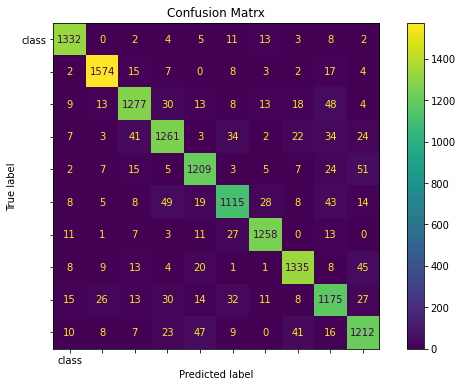

In [ ]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X_test, y_test, display_labels= digits_df.target_names, ax = ax)
disp.confusion_matrix

In [ ]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1380
           1       0.96      0.96      0.96      1632
           2       0.91      0.89      0.90      1433
           3       0.89      0.88      0.89      1431
           4       0.90      0.91      0.91      1328
           5       0.89      0.86      0.88      1297
           6       0.94      0.95      0.94      1331
           7       0.92      0.92      0.92      1444
           8       0.85      0.87      0.86      1351
           9       0.88      0.88      0.88      1373

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



3. Classify the dataset using logistic regression after applying the feature reduction using 
SVD. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [16]:
digits_df = mnist
X = digits_df.data
y = digits_df.target

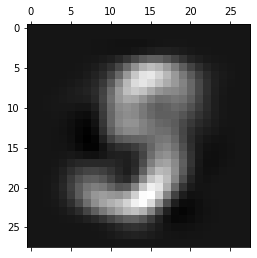

In [17]:
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X)

image = svd.inverse_transform(X_svd[0].reshape(1, -1))
plt.matshow(image.reshape((28, 28)), cmap = "gray")
plt.show()





In [18]:
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X_svd, y, test_size= 0.2, random_state = 1)
print('X_train dimension= ', X1_train.shape)
print('X_test dimension= ', X1_test.shape)
print('y_train dimension= ', y1_train.shape)
print('y_train dimension= ', y1_test.shape)

X_train dimension=  (56000, 10)
X_test dimension=  (14000, 10)
y_train dimension=  (56000,)
y_train dimension=  (14000,)


In [19]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X1_train, y1_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [20]:
lm.score(X1_test, y1_test)

0.776

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[1233,    0,   11,   34,    8,   42,   33,   11,    8,    0],
       [   0, 1559,   18,    9,    3,   14,    2,    2,   20,    5],
       [  40,   15, 1101,   48,   52,    1,   90,   29,   51,    6],
       [  12,   30,   42, 1093,    5,   89,   15,   33,   92,   20],
       [  11,   10,   14,    5, 1026,    9,   42,   19,   16,  176],
       [  55,   29,   15,  157,   76,  697,   44,   44,  107,   73],
       [  19,   29,   66,    7,    9,   30, 1156,    5,   10,    0],
       [  23,   36,   20,    2,   26,    8,    0, 1256,   20,   53],
       [   9,   64,   38,  112,   18,   63,    7,    4,  981,   55],
       [  18,   23,   31,   30,  285,   30,    4,  130,   60,  762]])

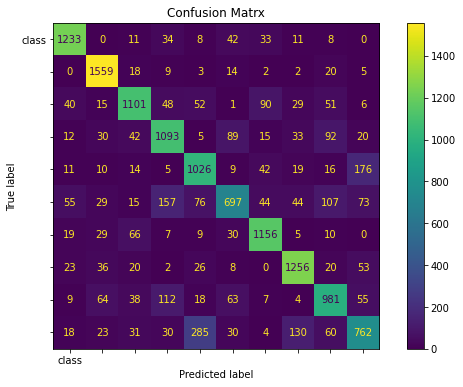

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X1_test, y1_test, display_labels= digits_df.target_names, ax = ax)
disp.confusion_matrix

In [22]:
print(metrics.classification_report(y1_test, lm.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1380
           1       0.87      0.96      0.91      1632
           2       0.81      0.77      0.79      1433
           3       0.73      0.76      0.75      1431
           4       0.68      0.77      0.72      1328
           5       0.71      0.54      0.61      1297
           6       0.83      0.87      0.85      1331
           7       0.82      0.87      0.84      1444
           8       0.72      0.73      0.72      1351
           9       0.66      0.55      0.60      1373

    accuracy                           0.78     14000
   macro avg       0.77      0.77      0.77     14000
weighted avg       0.77      0.78      0.77     14000



4. Find the optimal feature dimension based on the accuracy.

In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
digits_df = mnist
X2 = digits_df.data
y2 = digits_df.target

>1 0.199 (0.004)
>2 0.339 (0.006)
>3 0.471 (0.005)
>4 0.511 (0.005)
>5 0.642 (0.005)
>6 0.720 (0.005)
>7 0.748 (0.005)
>8 0.769 (0.005)
>9 0.784 (0.005)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>10 0.796 (0.005)
>11 0.803 (0.005)
>12 0.822 (0.005)
>13 0.828 (0.005)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>14 0.834 (0.005)
>15 0.837 (0.005)
>16 0.851 (0.004)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>17 0.858 (0.004)
>18 0.862 (0.004)
>19 0.868 (0.004)
>20 0.872 (0.004)
>21 0.874 (0.004)
>22 0.877 (0.004)
>23 0.881 (0.004)
>24 0.882 (0.004)
>25 0.883 (0.004)
>26 0.885 (0.004)
>27 0.885 (0.004)
>28 0.886 (0.004)
>29 0.887 (0.004)
>30 0.889 (0.004)
>31 0.890 (0.004)
>32 0.893 (0.004)
>33 0.894 (0.004)
>34 0.896 (0.004)
>35 0.897 (0.004)
>36 0.897 (0.004)
>37 0.898 (0.003)
>38 0.899 (0.004)
>39 0.899 (0.004)
>40 0.900 (0.004)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>41 0.901 (0.004)
>42 0.902 (0.004)
>43 0.903 (0.004)
>44 0.903 (0.004)
>45 0.904 (0.004)
>46 0.904 (0.004)
>47 0.905 (0.004)
>48 0.905 (0.004)
>49 0.905 (0.004)


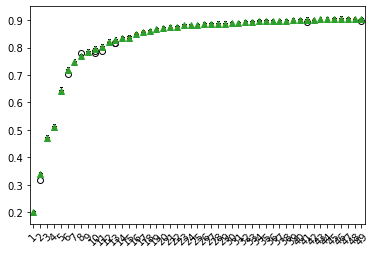

In [4]:
def get_models():
	models = dict()
	for i in range(1,50):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models
def evaluate_model(model, X2, y2):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X2, y2)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

5. For the optimal feature dimension, evaluate the model before and after applying the 
feature dimension based on Precision, Recall and F1-Score for each class.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [6]:
digits_df = mnist
X = digits_df.data
y = digits_df.target

In [7]:
svd = TruncatedSVD(n_components=21) # applying svd for optimal feature dimension
X_svd = svd.fit_transform(X)

In [8]:
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X_svd, y, test_size= 0.2, random_state = 1)
print('X_train dimension= ', X2_train.shape)
print('X_test dimension= ', X2_test.shape)
print('y_train dimension= ', y2_train.shape)
print('y_train dimension= ', y2_test.shape)

X_train dimension=  (56000, 21)
X_test dimension=  (14000, 21)
y_train dimension=  (56000,)
y_train dimension=  (14000,)


In [9]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X2_train, y2_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [11]:
lm.score(X2_test, y2_test)

0.8544285714285714

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[1307,    0,    8,    7,    7,   11,   15,    0,   23,    2],
       [   1, 1568,   12,    5,    0,   14,    2,    1,   27,    2],
       [  25,   11, 1164,   29,   40,    7,   44,   31,   56,   26],
       [  14,   11,   40, 1169,    3,   79,   12,   31,   42,   30],
       [   4,   10,   12,    1, 1151,   20,   13,    8,   27,   82],
       [  35,   20,   13,   86,   48,  934,   50,   22,   59,   30],
       [  15,    2,   24,    1,   13,   23, 1235,    2,   15,    1],
       [  22,   14,   28,    1,   22,    7,    3, 1300,    5,   42],
       [  13,   49,   29,   70,   12,   63,   10,    3, 1058,   44],
       [  11,   22,   19,   35,   81,   34,    2,   72,   21, 1076]])

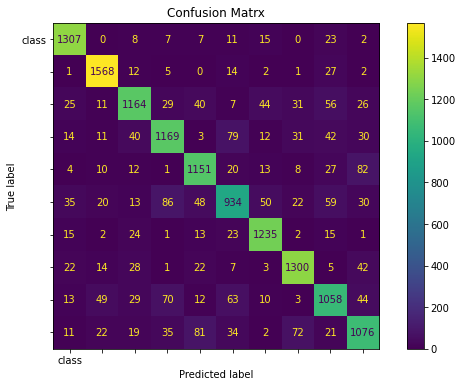

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, X2_test, y2_test, display_labels= digits_df.target_names, ax = ax)
disp.confusion_matrix

In [13]:
print("For the optimal feature dimension")
print(metrics.classification_report(y2_test, lm.predict(X2_test)))

For the optimal feature dimension
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1380
           1       0.92      0.96      0.94      1632
           2       0.86      0.81      0.84      1433
           3       0.83      0.82      0.82      1431
           4       0.84      0.87      0.85      1328
           5       0.78      0.72      0.75      1297
           6       0.89      0.93      0.91      1331
           7       0.88      0.90      0.89      1444
           8       0.79      0.78      0.79      1351
           9       0.81      0.78      0.79      1373

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

